In [1]:
from quantum_dataset import QM7, QM7b, QM9, Champs, SuperSet
from quantum_learning import Learn, Selector, ChampSelector
from quantum_model import FFNet
from torch.optim import Adam
from torch.nn import MSELoss, L1Loss

RDKit WARNING: [13:27:20] Enabling RDKit 2019.09.3 jupyter extensions


In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23, 
                'H': 4096, 
                'D_out': 1, 
                'model_name': 'funnel'}
ds_params = {}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss, 
      batch_size=256, epochs=100, opt_params=opt_params, model_params=model_params, 
      ds_params=ds_params, crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 23*23+13, 'H': 4096, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'target': 'E', 
             'features': ['alpha_p','alpha_s','HOMO_g','HOMO_p','HOMO_z','LUMO_g',
                          'LUMO_p','LUMO_z','IP','EA','E1','Emax','Imax']}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM7b, Model=FFNet, Sampler=Selector, 
      Optimizer=Adam, Criterion=MSELoss, batch_size=256, epochs=100, 
      opt_params=opt_params, model_params=model_params, ds_params=ds_params, 
      crit_params=crit_params, save_model=False, load_model=False)

In [ ]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 29*29+29+14, 'H': 1024, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
crit_params = {'reduction': 'sum'}

Learn(Dataset=QM9, Model=FFNet, Sampler=Selector, Optimizer=Adam, Criterion=MSELoss,
      batch_size=512, epochs=10, model_params=model_params, ds_params=ds_params, 
      opt_params=opt_params, crit_params=crit_params, save_model=False, load_model=False)

<class 'quantum_dataset.Champs'> dataset created...
epoch: 0 of 10, train loss: 6.230555137970045, val loss: 4.976386140894006
epoch: 1 of 10, train loss: 4.567279682765672, val loss: 4.623182808911359
epoch: 2 of 10, train loss: 4.460032512039893, val loss: 4.838401211632623
epoch: 3 of 10, train loss: 4.385891321527346, val loss: 4.3651748763190374
epoch: 4 of 10, train loss: 4.317238137308134, val loss: 4.332515174959913
epoch: 5 of 10, train loss: 4.2840841568478165, val loss: 4.358988208535277
epoch: 6 of 10, train loss: 4.2591986318089265, val loss: 4.352613843517539
epoch: 7 of 10, train loss: 4.238297183239664, val loss: 4.265737563003729
epoch: 8 of 10, train loss: 4.215330043456957, val loss: 4.198362265104129
epoch: 9 of 10, train loss: 4.188734063892318, val loss: 4.131019156656148
test loss: 4.203482585483127


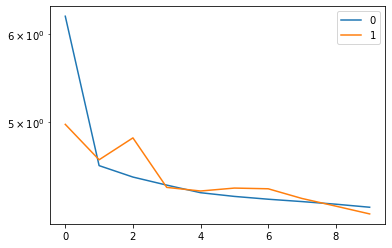

learning time: 0:01:10.242609


In [2]:
opt_params = {'lr': 0.001}
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}
crit_params = {'reduction': 'sum'}
sample_params = {'split': .1, 'subset': .1}

Learn(Dataset=Champs, Model=FFNet, Sampler=ChampSelector, Optimizer=Adam, Criterion=L1Loss,
      batch_size=1024, epochs=10, model_params=model_params, ds_params=ds_params, 
      sample_params=sample_params, opt_params=opt_params, crit_params=crit_params, 
      save_model=False, load_model=False)

In [ ]:
model_params = {'D_in': 128+32+64+32+64, 'H': 512, 'D_out': 1, 'model_name': 'funnel'}
ds_params = {'n': 4658146, 
             'features': False,
             'use_h5': False,  
             'infer': False}

Learn(Dataset=Champs, Model=FFNet, Sampler=Selector, batch_size=2048, model_params=model_params, 
      ds_params=ds_params, load_model='./models/20200603_1206.pth', adapt=False)

In [ ]:
ds_params = {'n': 133885, 
             'features': ['coulomb','mulliken','A','B','C','alpha','homo',
                          'lumo','gap','r2','zpve','H','U0','U','G','Cv'], 
             'target': 'mu',
             'dim': 29,
             'use_pickle': True}
q = QM9(**ds_params)